# Developing Models

After redoing the feature selection and engineering, applying the same previous machine learning models on the dataset cleaned and without the errors that arised in the previous iterration. 

In [9]:
# importing the packages 
from datetime import datetime
import numpy as np
import pandas as pd
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

## Loading the data 

In [4]:
final_train = pd.read_csv('ML_Artivatic_dataset/finalTrain.csv')
final_test = pd.read_csv('ML_Artivatic_dataset/finalTest.csv')

target_train = pd.read_csv('ML_Artivatic_dataset/target_train.csv')
test_member_id = pd.read_csv('ML_Artivatic_dataset/test_member_id.csv')

In [6]:
final_train.drop(columns=['member_id'])
final_train

,member_id,emp_length,loan_amnt,funded_amnt,funded_amnt_inv,sub_grade,int_rate,annual_inc,dti,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,mths_since_last_major_derog,last_week_pay,tot_cur_bal,total_rev_hi_lim,tot_coll_amt,recoveries,collection_recovery_fee,term,acc_now_delinq,collections_12_mths_ex_med,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc,total_repayment_progress
0,58189336,9.0,14350,14350,14350.0,43,19.19,28700.0,33.88,50.0,75.0,14.0,22515.0,73.1,28.0,1173.84,0.0,74.0,26.0,28699.0,30800.0,0.0,0.0,0.0,36,0.0,0.0,2.000000,0.0,14.0,1173.84,16.560510,16.560510
1,70011223,0.0,4800,4800,4800.0,14,10.99,65000.0,3.64,31.0,70.0,6.0,7624.0,23.2,13.0,83.95,0.0,44.0,9.0,9974.0,32900.0,0.0,0.0,0.0,36,0.0,0.0,13.541667,0.0,7.0,83.95,5.732484,5.732484
2,70255675,2.0,10000,10000,10000.0,4,7.26,45000.0,18.42,31.0,70.0,5.0,10877.0,31.2,19.0,56.47,0.0,44.0,9.0,38295.0,34900.0,65.0,0.0,0.0,36,0.0,0.0,4.500000,0.0,14.0,56.47,5.732484,5.732484
3,1893936,10.0,15000,15000,15000.0,35,19.72,105000.0,14.97,46.0,70.0,10.0,13712.0,55.5,21.0,4858.62,0.0,44.0,135.0,55564.0,24700.0,0.0,0.0,0.0,36,0.0,0.0,7.000000,0.0,11.0,4858.62,85.987261,85.987261
4,7652106,10.0,16000,16000,16000.0,12,10.64,52000.0,20.16,31.0,70.0,11.0,35835.0,76.2,27.0,2296.41,0.0,44.0,96.0,47159.0,47033.0,0.0,0.0,0.0,36,0.0,0.0,3.250000,0.0,16.0,2296.41,61.146497,61.146497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,31296187,10.0,20000,20000,20000.0,15,12.49,75000.0,14.53,31.0,51.0,12.0,15775.0,63.6,34.0,2595.45,0.0,44.0,65.0,83087.0,24800.0,0.0,0.0,0.0,36,0.0,0.0,3.750000,0.0,22.0,2595.45,41.401274,41.401274
532424,29403184,10.0,12000,12000,12000.0,25,14.99,59000.0,22.97,31.0,81.0,10.0,9453.0,53.1,29.0,2182.92,0.0,44.0,70.0,227812.0,17800.0,0.0,0.0,0.0,60,0.0,0.0,4.916667,0.0,19.0,2182.92,26.819923,26.819923
532425,7357607,8.0,18725,18725,18725.0,41,20.80,42504.0,27.27,26.0,70.0,14.0,12085.0,49.9,26.0,645.32,0.0,44.0,9.0,26010.0,24200.0,0.0,0.0,0.0,60,0.0,0.0,2.269907,0.0,12.0,645.32,3.448276,3.448276
532426,23182668,1.0,21000,21000,21000.0,32,16.29,50000.0,14.91,31.0,70.0,7.0,20902.0,89.7,14.0,4619.79,0.0,44.0,78.0,29197.0,23300.0,0.0,0.0,0.0,60,0.0,0.0,2.380952,0.0,7.0,4619.79,29.885057,29.885057


In [7]:
'''
Split data set into train-test-cv
Train model & predict
'''
# Split train and cross validation sets
X_train, X_test, y_train, y_test = train_test_split(np.array(final_train), np.array(target_train), test_size=0.30)
eval_set=[(X_test, y_test)]

Algorithms that we would be using 

In [13]:
algos = ['XGBoost','Random Forest', 'SGD Classifier', 'K Nearest Neighbors', 'Gradeient Boosting Classifier' ]
performance = []

## XGBoost 

In [12]:
print('Initializing xgboost.sklearn.XGBClassifier and starting training...')

st = datetime.now()

clf = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=20, 
    gamma=10, 
    n_estimators=500)

clf.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=True)


Initializing xgboost.sklearn.XGBClassifier and starting training...


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-auc:0.968353
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.968925
[2]	validation_0-auc:0.969234
[3]	validation_0-auc:0.97051
[4]	validation_0-auc:0.970719
[5]	validation_0-auc:0.970814
[6]	validation_0-auc:0.970925
[7]	validation_0-auc:0.971413
[8]	validation_0-auc:0.971546
[9]	validation_0-auc:0.971653
[10]	validation_0-auc:0.971846
[11]	validation_0-auc:0.971999
[12]	validation_0-auc:0.972216
[13]	validation_0-auc:0.972329
[14]	validation_0-auc:0.972553
[15]	validation_0-auc:0.972666
[16]	validation_0-auc:0.972711
[17]	validation_0-auc:0.972778
[18]	validation_0-auc:0.972819
[19]	validation_0-auc:0.972877
[20]	validation_0-auc:0.972931
[21]	validation_0-auc:0.972943
[22]	validation_0-auc:0.972952
[23]	validation_0-auc:0.972991
[24]	validation_0-auc:0.973032
[25]	validation_0-auc:0.973069
[26]	validation_0-auc:0.973079
[27]	validation_0-auc:0.97316
[28]	validation_0-auc:0.973192
[29]	validation_0-auc:0.973221
[30]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=10,
              learning_rate=0.05, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=9616,
              silent=None, subsample=1, verbosity=1)

In [15]:
perf_xgboost = roc_auc_score(y_test, clf.predict(X_test))
performance.append(xgboost)
print(perf_xgboost)

0.9239974277998122


In [ ]:
predictions = clf.predict

## Random Forest Classifier 

In [20]:
final_train.replace([np.inf, -np.inf], np.nan, inplace=True)

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')
final_train = imp.fit_transform(final_train)
# imp.fit_transform(target_train)

X_train, X_test, y_train, y_test = train_test_split(final_train, target_train, test_size=0.30)
eval_set=[(X_test, y_test)]

In [21]:
rf = RandomForestClassifier(n_estimators=100, verbose=5, n_jobs=-1)
rf.fit(np.array(X_train), np.array(y_train))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   20.5s


building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57

[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.6min


building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.4min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=5,
                       warm_start=False)

In [23]:
rf_perf = roc_auc_score(y_test, rf.predict(X_test))
performance.append(rf_perf)
rf_perf

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    3.5s finished


0.8980111672362449

## SGD Classifier

In [24]:
sgd = SGDClassifier(loss='modified_huber', verbose=2, n_jobs=-1, max_iter=1000)
sgd.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 76625712.73, NNZs: 33, Bias: 19946.827153, T: 372699, Avg. loss: 316667396241369.437500
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 45797147.16, NNZs: 33, Bias: 20835.215308, T: 745398, Avg. loss: 34866904861274.910156
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 33779088.35, NNZs: 33, Bias: 21308.762555, T: 1118097, Avg. loss: 20348585315236.546875
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 27035819.39, NNZs: 33, Bias: 21628.998766, T: 1490796, Avg. loss: 14517982285199.185547
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 22905578.74, NNZs: 33, Bias: 21869.589178, T: 1863495, Avg. loss: 11172080580263.386719
Total training time: 0.49 seconds.
-- Epoch 6
Norm: 20823633.61, NNZs: 33, Bias: 22068.353892, T: 2236194, Avg. loss: 9174988231949.587891
Total training time: 0.60 seconds.
-- Epoch 7
Norm: 18537521.43, NNZs: 33, Bias: 22228.251754, T: 2608893, Avg. loss: 7750670177334.291016
Total training time: 0.70 seconds.
-- Epoch 8
Norm: 171345

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=2, warm_start=False)

In [25]:
sgd_perf = roc_auc_score(y_test, sgd.predict(X_test))
performance.append(sgd_perf)
sgd_perf

0.6883404668290218

## KNeighbors Classifier

In [26]:
knc = KNeighborsClassifier(n_neighbors=20, n_jobs=-1)
knc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                     weights='uniform')

In [27]:
knc_perf = roc_auc_score(y_test, knc.predict(X_test))
performance.append(knc_perf)
knc_perf 

0.6898588816507618

## Gradient Boosting Classifier

In [30]:
gbc = GradientBoostingClassifier(n_estimators=1000, max_depth=3, verbose=2)
gbc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1           1.0014           46.94m
         2           0.9386           46.62m
         3           0.8825           46.44m
         4           0.8409           46.07m
         5           0.8063           45.89m
         6           0.7758           45.82m
         7           0.7502           45.64m
         8           0.7278           45.59m
         9           0.7094           45.53m
        10           0.6930           45.43m
        11           0.6809           45.27m
        12           0.6690           45.23m
        13           0.6593           45.13m
        14           0.6509           45.09m
        15           0.6355           45.05m
        16           0.6288           44.97m
        17           0.6181           44.91m
        18           0.6103           44.84m
        19           0.6055           45.04m
        20           0.5955           45.12m
        21           0.5881           45.19m
        2

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=2,
                           warm_start=False)

In [31]:
gbc_perf = roc_auc_score(y_test, gbc.predict(X_test))
performance.append(gbc_perf)
gbc_perf 

0.9058578537702224

## Comparing the performance of the algorithms 

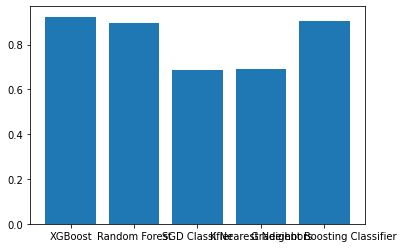

In [33]:
import matplotlib.pyplot as plt

plt.bar(algos, [perf_xgboost,rf_perf, sgd_perf, knc_perf, gbc_perf])
plt.show()

We can clearly see that XGBoost is the best performing model, and hence we are using it for predicting on the test data.

## Generating the predictions 

In [37]:
predictions = clf.predict(np.array(final_test))

In [39]:
submission = pd.DataFrame()
submission['member_id'] = final_test['member_id']
submission['loan_status'] = predictions 

In [40]:
submission.to_csv('ML_Artivatic_dataset/submission2.csv', index=False)